## Proyecto 1 
Alumno: Walter Alexander Ajtun Pisquiy

## 1.  Crear un entorno de anaconda con los paquetes que considere necesarios.

In [11]:
#Cargamos librerias
import numpy as np
import pandas as pd
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style


In [3]:
#Cargamos Data
datos = np.load('proyecto_training_data.npy')
print (datos)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [4]:
datos = np.load('proyecto_training_data.npy')
df = pd.DataFrame(datos)
df.columns =   ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [5]:
datos = np.load('proyecto_training_data.npy')
df = pd.DataFrame(datos)
df

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0


## 2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80%) y validacion y pruebas(20%).

In [6]:
# Obtener la cantidad total de filas en los datos
total_filas = datos.shape[0]

# Calculamos el número de filas para el conjunto de entrenamiento (80%)
filas_entrenamiento = int(0.8 * total_filas)

# Obtenemos los datos de entrenamiento
datos_entrenamiento = datos[:filas_entrenamiento]

# Obtenemos los datos de validación y pruebas
datos_validacion_pruebas = datos[filas_entrenamiento:]


## 3

In [10]:

# Asignar nombres a las columnas en inglés para una mejor comprensión
column_names = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df = pd.DataFrame(datos, columns=column_names)
print("Realizando análisis exploratorio para las variables")

# Calcular las estadísticas para cada variable
estadisticas = pd.DataFrame({
    'Variable': column_names,
    'Media': df.mean(),
    'Máximo': df.max(),
    'Mínimo': df.min(),
    'Rango': df.max() - df.min(),
    'Desviación Estándar': df.std()
})

# Mostrar las estadísticas utilizando tabulate
print(tabulate(estadisticas, headers='keys', tablefmt='fancy_grid', showindex=False))


Realizando análisis exploratorio para las variables
╒══════════════╤══════════════╤══════════╤══════════╤═════════╤═══════════════════════╕
│ Variable     │        Media │   Máximo │   Mínimo │   Rango │   Desviación Estándar │
╞══════════════╪══════════════╪══════════╪══════════╪═════════╪═══════════════════════╡
│ SalePrice    │ 180921       │   755000 │    34900 │  720100 │           79442.5     │
├──────────────┼──────────────┼──────────┼──────────┼─────────┼───────────────────────┤
│ OverallQual  │      6.09932 │       10 │        1 │       9 │               1.383   │
├──────────────┼──────────────┼──────────┼──────────┼─────────┼───────────────────────┤
│ 1stFlrSF     │   1162.63    │     4692 │      334 │    4358 │             386.588   │
├──────────────┼──────────────┼──────────┼──────────┼─────────┼───────────────────────┤
│ TotRmsAbvGrd │      6.51781 │       14 │        2 │      12 │               1.62539 │
├──────────────┼──────────────┼──────────┼──────────┼─────────┼─────

### 4.	Para  cada  variable  en  el  dataset  usar  seaborn(funcion  distplot  https://seaborn.pydata. org/generated/seaborn.distplot.html) para graficar un histograma de la variable.

C:\Users\walte\AppData\Local\Temp\ipykernel_20512\2386853980.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], kde=False, color='blue', bins=20)  # Graficar histograma con 20 bins


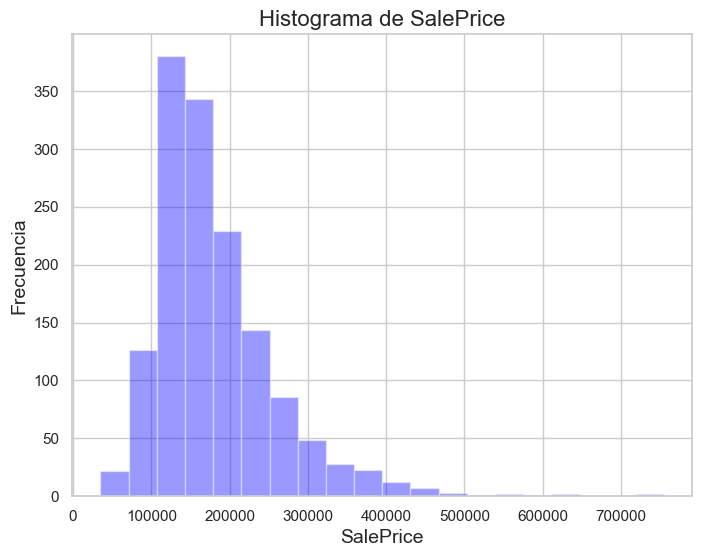

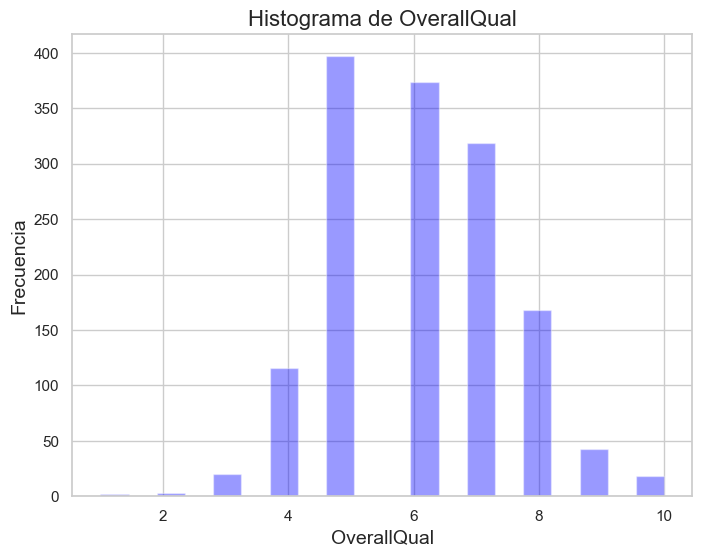

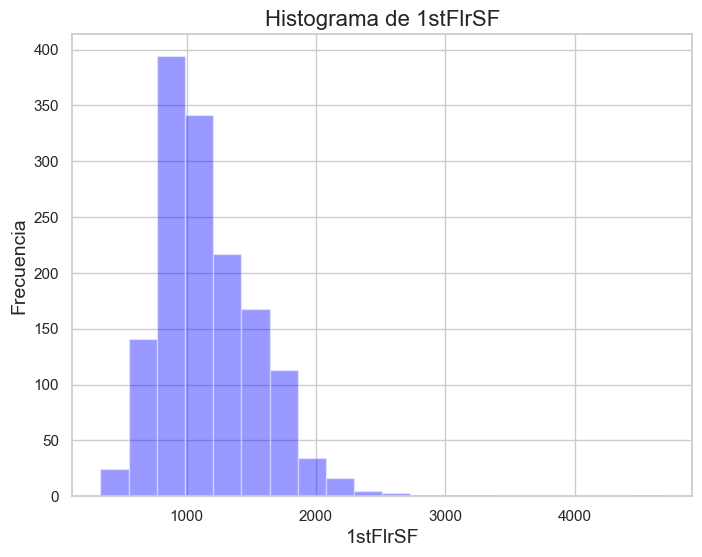

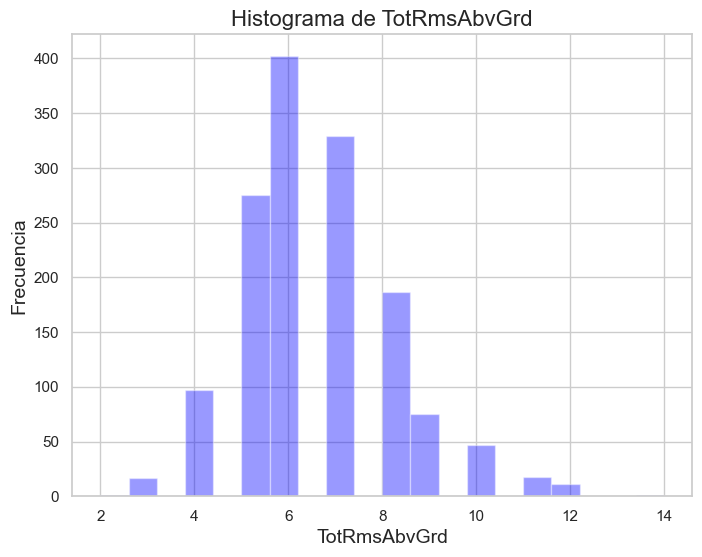

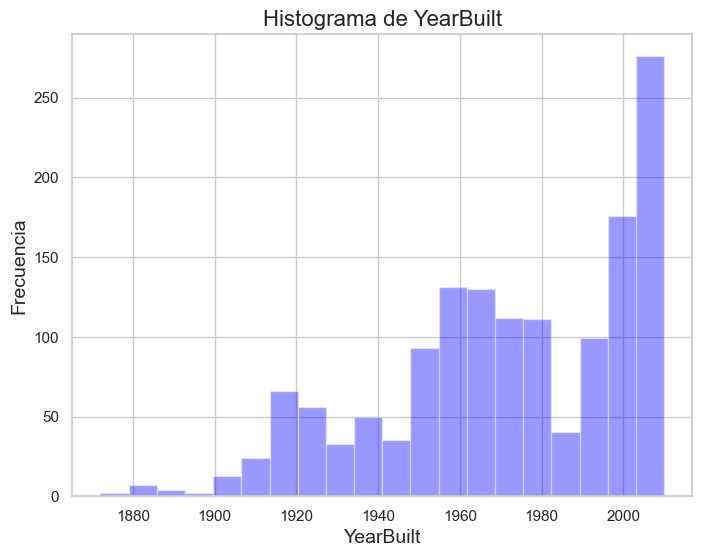

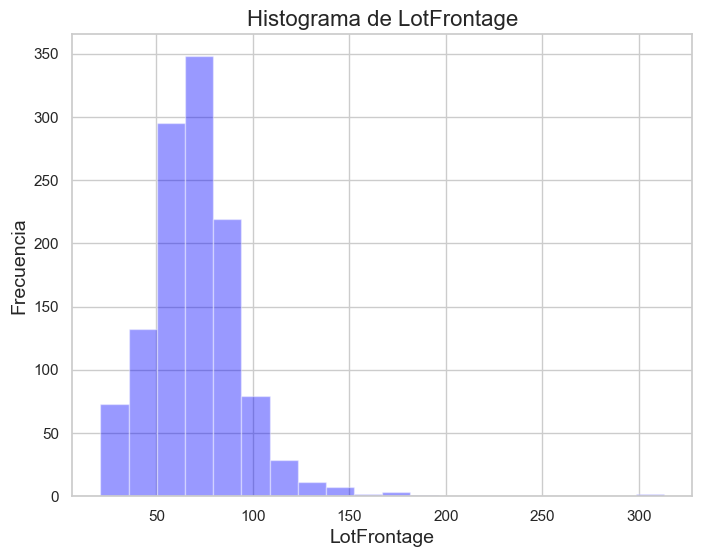

In [12]:
# Asignar nombres a las columnas en inglés para una mejor comprensión
column_names = ['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df = pd.DataFrame(datos, columns=column_names)

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Iterar sobre cada variable y graficar su histograma
for column in column_names:
    plt.figure(figsize=(8, 6))
    sns.distplot(df[column], kde=False, color='blue', bins=20)  # Graficar histograma con 20 bins
    plt.title(f'Histograma de {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Frecuencia', fontsize=14)
    plt.show()


## 5. Para cada variable independiente x :
Calcular el coeficiente de correlaci´on entre x y y.
Graficar x vs y(scatterplot) usando matplotlib.
Colocar el coeficiente de correlaci´on y colocarlo como parte del t´ıtulo de la gr´afica.
Basado en la gr´afica y el coeficiente de correlaci´on de cada par x,y elegir las 2 variables
con m´as potencial predictivo es decir las 2 variables que presentan mayor correlaci´on
entre dicha variable y la variable dependiente.